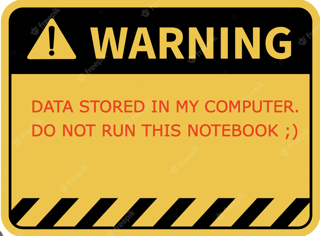

In [ ]:
import numpy as np
import pandas as pd
import time

# Convert CSV to Parquet

In Python, Parquet is a file format for storing and processing large amounts of structured data. It is designed to be efficient for both reading and writing large datasets, and is especially well-suited for use with distributed computing frameworks such as Apache Hadoop and Apache Spark.

In [ ]:
start = time.time()

trans = pd.read_csv('transactions.csv')
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')

end = time.time()
print(f"Loading time for csv format: {np.round(end - start)}")

Loading time for csv format: 48.0


In [ ]:
# Save the csv file to parquet. 
trans.to_parquet('trans_parquet.parquet')
articles.to_parquet('articles_parquet.parquet')
customers.to_parquet('customers_parquet.parquet')

In [ ]:
# Read the parquet data.
start = time.time()

trans_par = pd.read_parquet('trans_parquet.parquet')
articles_par = pd.read_parquet('articles_parquet.parquet')
customers_par = pd.read_parquet('customers_parquet.parquet')

end = time.time()

print(f"Loading time for parquet format: {np.round((end - start),2)}")

Loading time for parquet format: 28.73


# Transaction table

In [ ]:
trans_par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


## Modify time

In [ ]:
trans_par["date"] = pd.to_datetime(trans_par["t_dat"])

In [ ]:
trans_par.drop(columns=["t_dat"], inplace=True)

In [ ]:
trans_par

,customer_id,article_id,price,sales_channel_id,date
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09-20
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09-20
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09-20
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09-20
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09-20
...,...,...,...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2020-09-22
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2020-09-22
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,2020-09-22
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,2020-09-22


## Remove offline sales channel

In [ ]:
trans_fitlered = trans_par[trans_par['sales_channel_id'] == 2]

In [ ]:
trans_fitlered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22379862 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   customer_id       object        
 1   article_id        int64         
 2   price             float64       
 3   sales_channel_id  int64         
 4   date              datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.0+ GB


## Create columns for year, month etc

# Customer Table

In [ ]:
customers_par.head(5)

,customer_id,Active,age
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,52.0
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,32.0
13,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.0,56.0
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,29.0
15,0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...,1.0,54.0


## Keep Online Channel Only

In [ ]:
customers_par = customers_par.loc[customers_par['Active'] == 1.0]

## Drop FN, Club member status, fashion news frequency and postal code

In [ ]:
customers_par.drop(columns=["club_member_status","FN","fashion_news_frequency","postal_code"], inplace=True)

## Impute Missing Ages by mean/ drop them

In [ ]:
missing_ages = customers_par.isna().sum()
missing_ages

customer_id    0
Active         0
age            0
dtype: int64

In [ ]:
# import pandas as pd

# def impute_missing_data(customers_par):
#     """Impute missing data in a Pandas dataframe using the mean value of the corresponding column."""
#     for col in df.columns:
#         if df[col].isna().sum() > 0:
#             mean_value = df[col].mean()
#             df[col].fillna(mean_value, inplace=True)
#     return customers_par


In [ ]:
customers_par.dropna(subset=['age'], inplace=True)

# Acticle Table

In [ ]:
articles_par.sample(2)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name
92936,855823005,855823,Swift midi bodycon,265,Dress,Garment Full body,1010004,Check,9,Black,...,1344,Dresses,D,Divided,2,Divided,53,Divided Collection,1013,Dresses Ladies
25454,612941001,612941,Playful danceshoe,89,Other shoe,Shoes,1010009,Glittering/Metallic,51,Light Pink,...,4314,Kids Dress-up/Football,J,"Children Accessories, Swimwear",4,Baby/Children,43,"Kids Accessories, Swimwear & D",1019,Accessories


## Drop Description 

In [ ]:
articles_par.drop(columns=['detail_desc'],inplace=True)

# Image

## Data file is too big - see 2.1 notebook to reduce file size by low resolutions

# Output CSV

In [ ]:
trans_fitlered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22379862 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   customer_id       object        
 1   article_id        int64         
 2   price             float64       
 3   sales_channel_id  int64         
 4   date              datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.0+ GB


In [ ]:
customers_par.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463229 entries, 4 to 1371978
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  463229 non-null  object 
 1   Active       463229 non-null  float64
 2   age          463229 non-null  float64
dtypes: float64(2), object(1)
memory usage: 14.1+ MB


In [ ]:
articles_par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
trans_fitlered.to_csv('trans_DF', index=False)
customers_par.to_csv('customers_DF', index=False)
articles_par.to_csv('articles_DF', index=False)